In [279]:
import pandas as pd
from sklearn.datasets import make_circles

In [5]:
# sample size for dataset
sample_size = 1000

In [174]:
X,y = make_circles(sample_size,noise=0.03, random_state=42)

In [7]:
X, y

(array([[ 0.74822656,  0.23908325],
        [-0.74509559,  0.16097526],
        [-0.82262532,  0.19762051],
        ...,
        [-0.13256546, -0.8180725 ],
        [ 0.66563305, -0.78034584],
        [ 0.27973578,  0.96559198]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

In [9]:
class Plot:
    def __init__(self,p,y,flag=False):
        self.p = p[:,0]
        self.q = p[:,1]
        self.y = y
        self.train_data = self.p[:int(0.8 * len(self.p))]
        self.test_data = self.p[int(0.8 * len(self.p)) : ]
        if(flag): self.plotTheGraph()
        
        
    def plotTheGraph(self):
        plt.figure(figsize=(10,7))
        plt.scatter(self.p,self.q , c=self.y,cmap=plt.cm.RdBu_r,label="X")
        plt.legend();

        

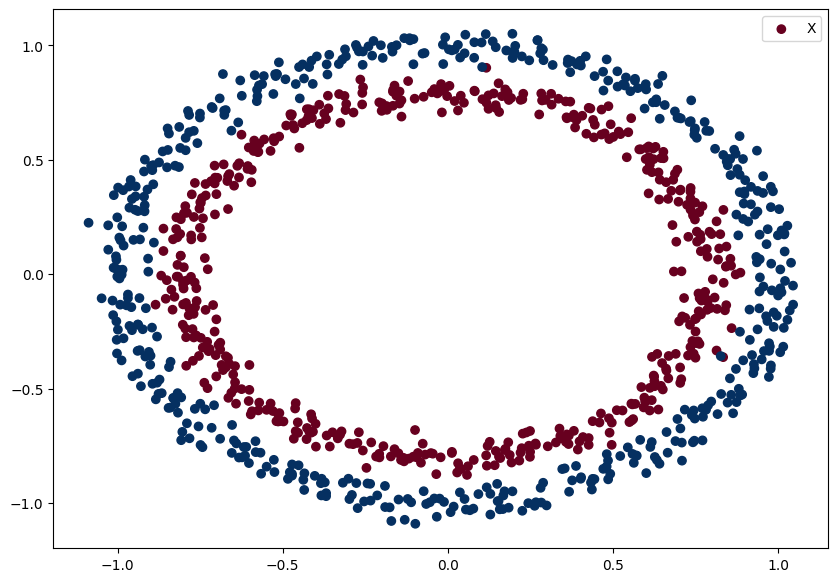

In [10]:
Plot(X,y, True)

In [11]:
# Shape of Input and Output Tensors
print("Input Shape :: ", X.shape)
print("Output Shape :: ", y.shape)

Input Shape ::  (1000, 2)
Output Shape ::  (1000,)


**Two Features of X determines the output i.e y**

## Model

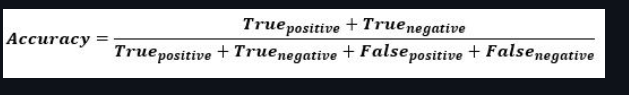

In [321]:
tf.random.set_seed(42)

# Creating Model using Seqeuntial API
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear"),
    tf.keras.layers.Dense(1)
])

# Compiling the model

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fitting 

history1 = model1.fit(X,y , epochs=25)

Epoch 1/25
32/32 [==============================] - 0s 1ms/step - loss: 1.4846 - accuracy: 0.4600
Epoch 2/25
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4820
Epoch 3/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.4490
Epoch 4/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4860
Epoch 5/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5010
Epoch 6/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5150
Epoch 7/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4920
Epoch 8/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4930
Epoch 9/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4940
Epoch 10/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4830
Epoch 11/25
32/32 [

In [319]:
def plotTheModel(X,y,model):
    """
    1. Define the boundary limit
    2. Create Meshgrid ((x,y) pairs for the graph) // Linspace -> creates uniform interval in axis
    3. Change tensor to 1D array and then form the pairs
    4. Predict the y
    5. Distingiush Binary and Multiclass
    6. Decision Boundary and Graph Plot
    """
    x_min , x_max = X[:,0].min() - 0.1 , X[:,0].max() + 0.1
    y_min , y_max = X[:,1].min() - 0.1 , X[:,1].max() + 0.1 
    x_mesh , y_mesh = np.meshgrid(np.linspace(x_min, x_max, 100),
                                  np.linspace(y_min, y_max, 100))
    
    # Change the tensor and build 2D Stack
    x_inp = np.c_[x_mesh.ravel(), y_mesh.ravel()] # ravel -> changes the tensor to 1D array & .c_ ::> stack up to 2D
    
    # Prediction of the model
    y_predict = model.predict(x_inp)
    
    # Distinguish
    
    if(model.output_shape[-1]) > 1:
        print("Performing Multiclass Classification")
        y_predict = np.argmax(y_predict, axis=1).reshape(x_mesh.shape)
    else:
        print("Performing Binary Classification")
        y_predict = np.round(np.max(y_predict, axis=1)).reshape(x_mesh.shape)
        '''
        ____________________
        Equivalent Code    till np.max  
        ____________________
        temp = list()
        for _ in range(1000):
            temp.append(y_predict[_,0].max())
            np.array(temp)
        np.max(y_predict, axis=1), temp
        '''
        
    # Decision Boundary
    plt.contourf(x_mesh, y_mesh, y_predict, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.RdYlBu)
    plt.xlim(x_mesh.min(), x_mesh.max())
    plt.ylim(y_mesh.min(), y_mesh.max())

    

def plotHistory(hist):
    pd.DataFrame(hist.history).plot()

313/313 [==============================] - 0s 871us/step
Performing Binary Classification


(None, None)

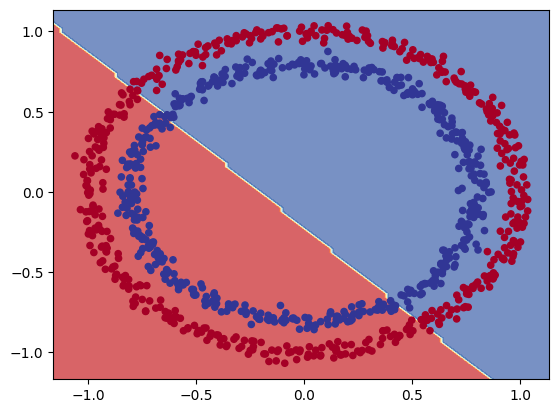

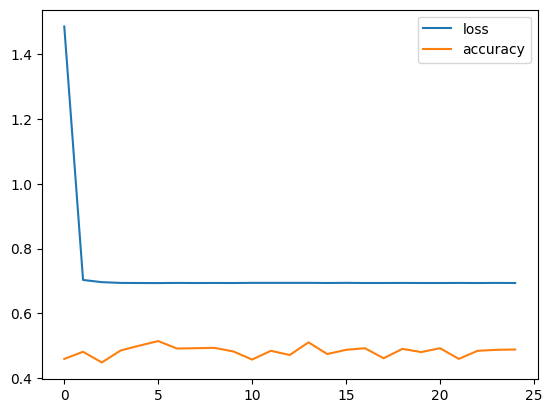

In [322]:
plotTheModel(X,y,model1), plotHistory(history1)

# Model 2


#### Having activation unit as relu & optimizer as Adam
- Two Input Layers
- Activation Unit ::: relu
- Optimizer ::: Adam

In [362]:
tf.random.set_seed(42)

# Creating Model using Seqeuntial API
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear"),
    tf.keras.layers.Dense(1)
])

# Compiling the model

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

# Fitting 

history2 = model2.fit(X,y , epochs=100, verbose=0)

313/313 [==============================] - 0s 811us/step
Performing Binary Classification


(None, None)

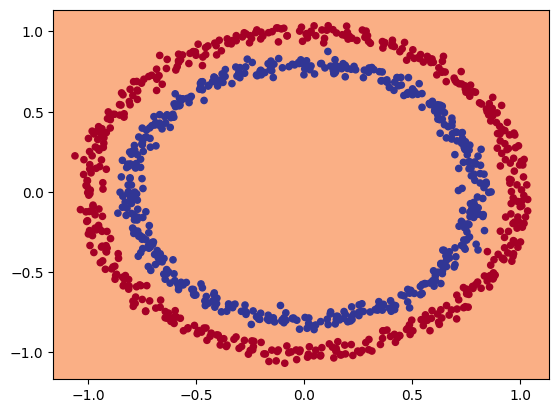

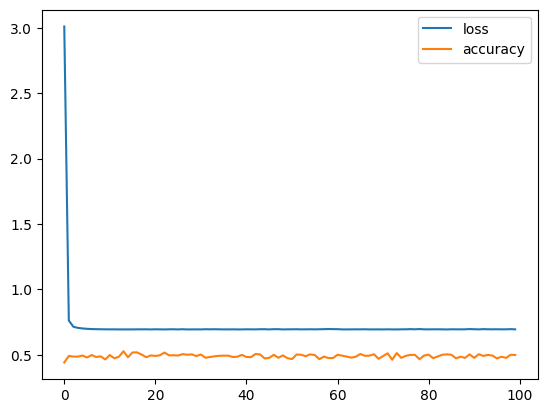

In [363]:
plotTheModel(X,y,model2) , plotHistory(history2)

## Model3 
-------------------------
- Hidden Layers - 3
- Hidden Units for input layers - 100
- Activation Unit - Linear | Relu
- Optimizer - SGD | Adam
- Losses - Binarycrossentropy | Binary_crossentropy
---------------------------

In [218]:
# Set Random seed
tf.random.set_seed(42)

# Sequential API

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="linear"),
    tf.keras.layers.Dense(100, activation="linear"),
    tf.keras.layers.Dense(1)
])

# Model Compilation

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Model Fitting

history3 = model3.fit(X,y, epochs=25,verbose=0)
type(history3)


keras.callbacks.History

313/313 [==============================] - 1s 3ms/step
Performing Binary Classification


(None, None)

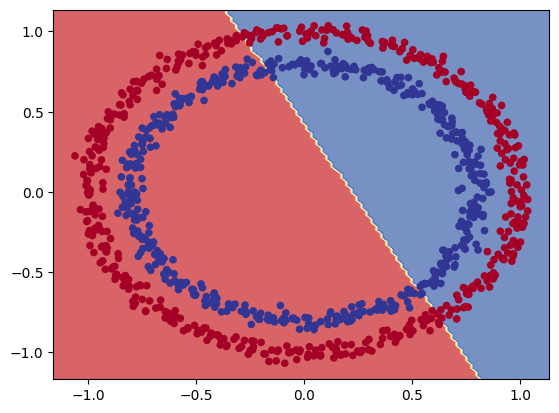

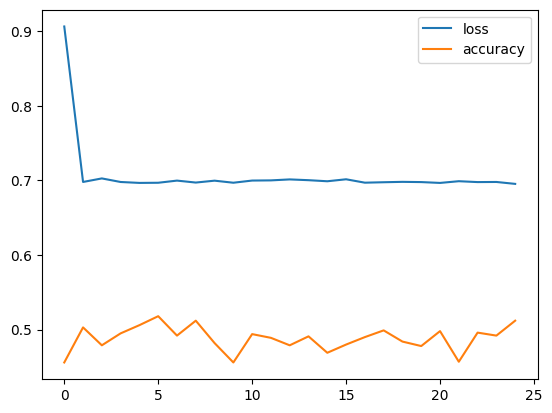

In [278]:
plotTheModel(X,y,model3) , plotHistory(history3)

In [241]:
history3.history["loss"][-1], history3.history["accuracy"][-1] * 100

(0.6952686905860901, 51.20000243186951)

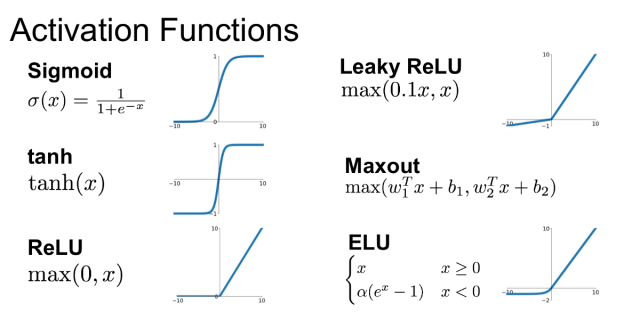


In [307]:
def sigmod(x):
    return (1/(1+ tf.exp(-x)))

def relu(x):
    return tf.maximum(0, x)

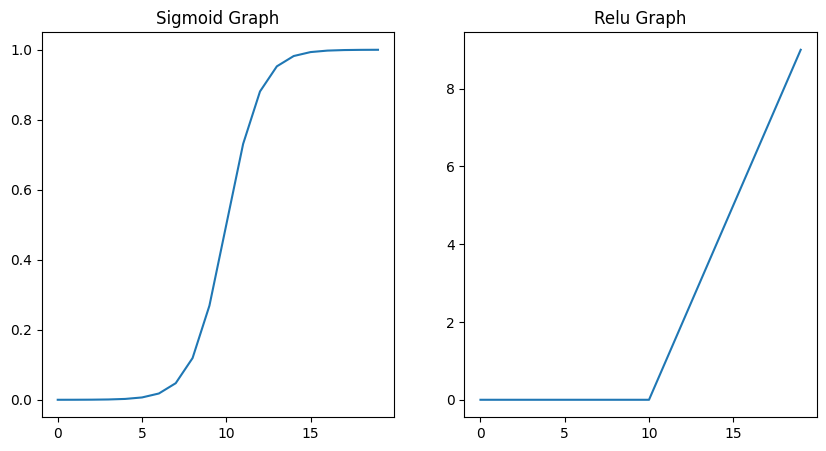

In [372]:
# Create a sample data
samp = tf.cast(tf.range(-10, 10), tf.float32)
plt.figure(figsize =(10,5))
plt.subplot(1,2,1)
plt.title("Sigmoid Graph")
plt.plot(sigmod(samp))
plt.subplot(1,2,2)
plt.title("Relu Graph")
plt.plot(relu(samp))

In [306]:
relu(samp)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

## Model 4

##### Changes Made to previous

- Putting 4 hidden units to the hidden layers
- Since, the data is non-linear, for the output, using exponential activation
- Using Input activation as sigmoid
- optimizer as Adam with lr=0.01

**Check the graph of relu & Sigmoid**

In [368]:
tf.random.set_seed(42)

# Create a model 

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.exponential)
])

# Compilation of a Model

model4.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["accuracy"])

# Fitting of a model

history4 = model4.fit(X,y, epochs=100,verbose=0)

313/313 [==============================] - 0s 826us/step
Performing Binary Classification


(None, None)

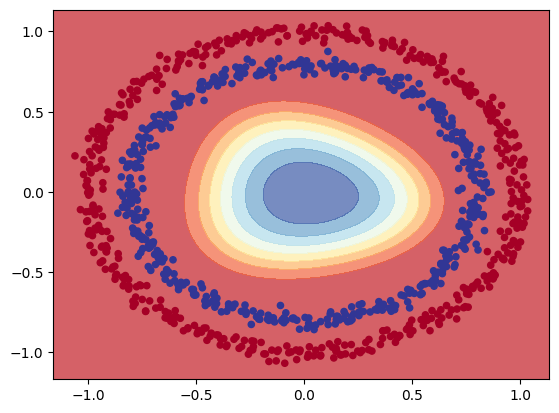

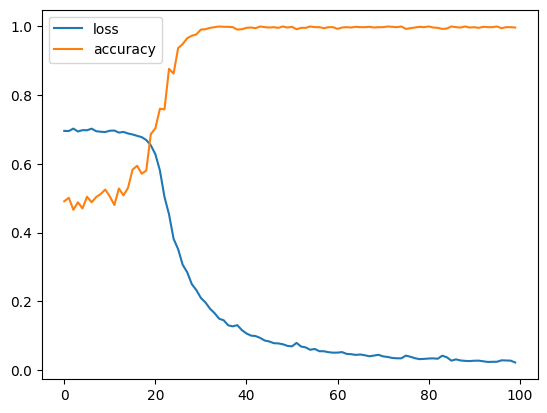

In [369]:
plotTheModel(X,y,model4) , plotHistory(history4)

In [370]:
history4.history["accuracy"][-1] * 100

99.59999918937683


## Model 5

##### Changes Made to previous

- Putting 4 hidden units to the hidden layers
- Since, the data is non-linear, for the output, using sigmoid activation
- Using Input activation as relu
- optimizer as Adam with lr=0.02

In [376]:
tf.random.set_seed(42)

# Create a model 

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compilation of a Model

model5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["accuracy"])

# Fitting of a model

history5 = model5.fit(X,y, epochs=100,verbose=0)

313/313 [==============================] - 0s 886us/step
Performing Binary Classification


(None, None)

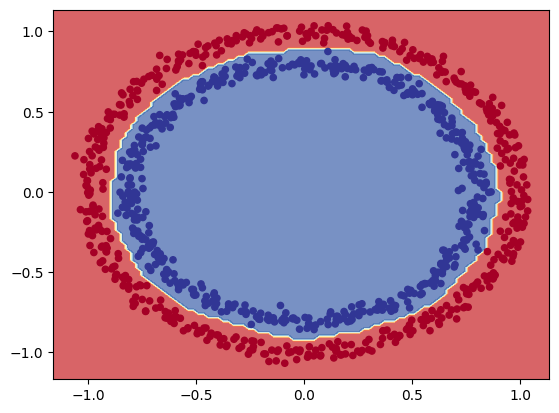

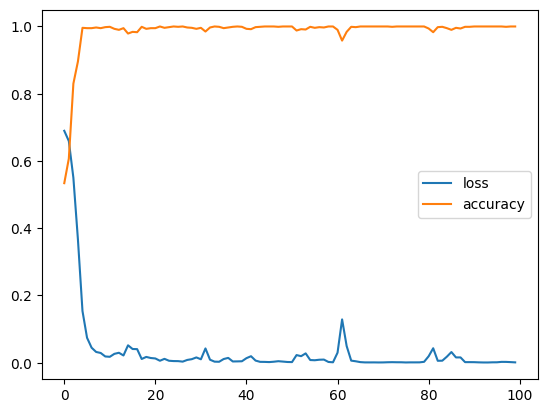

In [377]:
plotTheModel(X,y,model5) , plotHistory(history5)

In [379]:
## Accuracy 
acc = history5.history["accuracy"][-1] * 100 
loss = history5.history["loss"][-1]
print(f"Model 5 accuracy is {acc} %")
print(f"Loss is  {loss}")

Model 5 accuracy is 100.0 %
Loss is  0.0010744567262008786
